![Astrofisica Computacional](../logo.PNG)

---
## 01. Ecuación de Difusión

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se presenta un método de solución de la ecuación de Difussión.


---

---

## La Ecuación de Difusión

A continuación aplicaremos algunas modificaciones de los métodos descritos en lecciones anteriores para solucionar la  **ecuación de difusión** (también llamada ecuación de calor), 

\begin{equation}
\frac{\partial \phi}{\partial t} = k \nabla^2 \phi.
\end{equation}

En esta ecuación $\phi = \phi(t,x,y,z)$ es la función desconocida y $k$ es una constante. $\nabla^2$ representa el operador diferencial de Laplace,

\begin{equation}
\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial x^2}
\end{equation}

Ya que esta ecuación involucra dependencias temporal y espacial, se requieren condiciones de frontera al igual que una condición inicial. Por esta razón, no es posible construir un sistema algebraico lineal como en el caso del a ecuación de Poisson y tampoco es posible aplicar el método de relajación inmediatamente. Por ello se definirán algunos métodos particulares.

---

## El Método FTCS (Forward in Time Centered in Space)

La ecuación de difusión unidimensional en coordenadas cartesianas toma la forma

\begin{equation}
\frac{\partial \phi}{\partial t} = k \frac{\partial^2 \phi}{\partial x^2}
\end{equation}

y supondremos que , como condición inicial, conocemos todos los valores $\phi(t=0,x)$.

En este método se dividirá el espacio en una malla discreta rectangular de coordenadas cartesianas en cuya frontera se conoce el valor de la función $\phi$ (condiciones de frontera) y en cuyo interior se quiere encontrar la solución. En este caso particular, supondremos que la region espacial unidimensional se dividirá utilizando $N+1$ nodos de tal forma que el tamaño de cada uno de los intervalos construidos es $\Delta x$. De esta forma, los valores discretos de la coordenada x se denotarán como $x_i$ con $i=0,1,2,...,N$. 

Luego de definir la malla de discretización, el siguiente paso es discretizar los operadores diferenciales. En este caso, se trabajará con la segunda derivada aproximada como una diferencia centrada,

\begin{align}
\frac{\partial^2 \phi}{\partial x^2} = &\frac{\phi(t, x+ \Delta x) - 2\phi(t, x) + \phi(t, x-\Delta x)}{\Delta x^2}.
\end{align}

De esta forma, la ecuación se convierte en

\begin{align}
\frac{\partial \phi}{\partial t} = k \frac{\phi(t, x+\Delta x) - 2\phi(t,x) + \phi(t,x-\Delta x)}{\Delta x^2} .
\end{align}

Si ahora se piensa que en esta relación los valores de $\phi$ en cada uno de los puntos involucrados son variables (funciones) independientes, se tendrá un conjunto de ecuaciones diferenciales ordinarias simultáneas en esas funciones. Este conjunto se puede solucionar con los métodos descritos en lecciones anteriores para las ODEs (Euler, RK, etc.). 

Sin embargo, debe tenerse en cuenta que en este caso se deben resolver muchas ecuaciones al mismo tiempo (pueden ser centenas, miles o millones! dependiendo del tamaño de la malla espacial utilizada y del número de dimensiones involucrado). Por ello, la técnica mas utilizada para resolver el problema de valor inicial es el método de Euler (de hecho, la precisión de la discretización hecha en el lado derecho es de segundo orden y por ello el método de Euler es apropiado para la evolución temporal). De esta forma, aplicando el método de Euler para la evolución temporal se tendrá

\begin{align}
\frac{\phi(t+\Delta t, x) - \phi (t,x)}{\Delta t} = k \frac{\phi(t,x+\Delta x) - 2\phi(t,x) + \phi(t,x-\Delta x)}{\Delta x^2}
\end{align}

de donde se obtiene de inmediato

\begin{align}
\phi(t+\Delta t, x) = \phi (t,x) + \frac{\Delta t}{\Delta x^2} k \left[ \phi(t,x+\Delta x) - 2\phi(t,x) + \phi(t,x-\Delta x) \right]
\end{align}


Para aplicar este algoritmo, debe conocerse el valor de $\phi$ en todos los puntos del espacio en un instante $t$, luego, esta ecuación nos permite encontrar el valor de $\phi$ en todos los puntos para el instante $t+\Delta t$. Debido a la discretización utilizada, este método se conoce como *Adelante en el Tiempo, Centrado en el Espacio*  (Forward in Time Centered in Space **FTCS**) 

La ecuación iterativa correspondiente será

\begin{align}
\phi^{n+1}_i = \phi^n_i + \frac{k\Delta t}{\Delta x^2}  \left[ \phi^n_{i+1} - 2\phi^n_i + \phi^n_{i-1} \right]
\end{align}

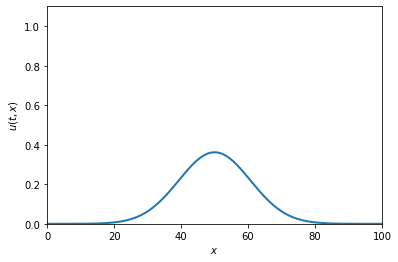

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = np.linspace(x_i, x_f, 1000)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 500.
dt = 0.05
tgrid = np.arange(t_i, t_f, dt)


# Definition of the initial Gaussian profile
def Psi(x):
    x0 = 50. 
    sigma = np.sqrt(15.)
    return np.exp(-(x-x0)**2/(2*sigma**2))

# Diffusion Coefficient
k = 0.1

# FTCS Method
def FTCS(u):
    unew = np.zeros(len(xgrid))
    for j in range(1,len(xgrid)-1):
        unew[j] = u[j] + ((k*dt)/(dx**2))*(u[j+1] - 2*u[j] + u[j-1])
    # Outflow boundary conditions 
    unew[0] = unew[1]
    unew[-1] = unew[-2]
    return unew

u_data = np.zeros([len(tgrid), len(xgrid)])
u_data[0,:] = Psi(xgrid)

# Main Loop 
for i in range(1,len(tgrid)):
    u_data[i,:] = FTCS(u_data[i-1,:])


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0, 100))
ax.set_ylim((0., 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = xgrid
    step = int(len(tgrid)/200)
    y = u_data[step*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 ms each
                               blit=True)

HTML(anim.to_jshtml())

---

## Método FTCS en 2-dimensiones

La generalización del método FTCS a dos o tres dimensiones espaciales es inmediata. Consideraremos el caso dos dimensiones


\begin{equation}
\frac{\partial \phi}{\partial t} = k \left[\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} \right].
\end{equation}

Se utilizará ahora una malla rectangular de coordenadas cartesianas con $M+1$ nodos en la dirección-x y $N+1$ nodos en la dirección-y, para un total de $(M+1) \times (N+1)$ nodos en total. Los valores discretos de la coordenada x se denotarán como $x_i$ con $i=0,1,2,...,M$ mientras que los valores discretos de la coordenada y se denotarán como $y_j$ con $j=0,1,2,...,N$. El valor de la función $\phi$ en el punto $(n \Delta t,x_i,y_j)$ se denotará como $\phi(n \Delta t, x_i, y_j) = \phi^{(n)}_{i,j}$

Luego de definir la malla de discretización, el siguiente paso es discretizar los operadores diferenciales. En este caso, se trabajará con las segundas derivadas aproximadas como diferencias centradas,

\begin{align}
\frac{\partial^2 \phi}{\partial x^2} = &\frac{\phi(x+\Delta x,y) - 2\phi(x,y) + \phi(x-\Delta x,y)}{\Delta x^2}\\
\frac{\partial^2 \phi}{\partial y^2} = &\frac{\phi(x,y+\Delta y) - 2\phi(x,y) + \phi(x,y-\Delta y)}{\Delta y^2},
\end{align}

donde se han utilizado dos tamaños de la malla de diferentes, $\Delta x$ y $\Delta y$, en las dos direcciones. Si tomamos el caso particular en el que $\Delta x = \Delta y = h$, el operador Laplaciano aplicado a la función $\phi$ en la ecuación se convierte en

\begin{align}
\frac{\partial \phi}{\partial t} = k \left[ \frac{\phi(x+h,y) - 2\phi(x,y) + \phi(x-h,y)}{h^2} + \frac{\phi(x,y+h) - 2\phi(x,y) + \phi(x,y-h)}{h^2}\right] \\
\frac{\partial \phi}{\partial t} = k \left[\frac{\phi(x+h,y) - 2\phi(x,y) + \phi(x-h,y) + \phi(x,y+h) - 2\phi(x,y) + \phi(x,y-h)}{h^2} \right] \\
\frac{\partial \phi}{\partial t} = k \left[ \frac{\phi(x+h,y)  + \phi(x-h,y) + \phi(x,y+h)  + \phi(x,y-h) - 4\phi(x,y)}{h^2} \right]
\end{align}

o utilizando la notación de sub-índices,

\begin{equation}
\frac{\partial \phi_{i,j}}{\partial t} = k \left[ \frac{\phi_{i+1,j}  + \phi_{i-1,j} + \phi_{i,j+1}  + \phi_{i,j-1} - 4\phi_{i,j}}{h^2} \right]
\end{equation}

Ahora aplicamos el método de Euler en el lado izquierdo,

\begin{equation}
\frac{\phi^{(n+1)}_{i,j} - \phi^{(n)}_{i,j}}{\Delta t} = k \left[ \frac{\phi^{(n)}_{i+1,j}  + \phi^{(n)}_{i-1,j} + \phi^{(n)}_{i,j+1}  + \phi^{(n)}_{i,j-1} - 4\phi^{(n)}_{i,j}}{h^2} \right]
\end{equation}

y con ello se obtiene el esquema iterativo

\begin{equation}
\phi^{(n+1)}_{i,j} = \phi^{(n)}_{i,j} + \alpha \left[ \phi^{(n)}_{i+1,j}  + \phi^{(n)}_{i-1,j} + \phi^{(n)}_{i,j+1}  + \phi^{(n)}_{i,j-1} - 4\phi^{(n)}_{i,j} \right]
\end{equation}

donde se ha definido el *Número de Courant*,  $\alpha = \frac{\Delta t}{h^2} k $.

### Estabilidad del Método FTCS

Para analizar la estabilidad del método FTCS, se examinará el comportamiento de la solución aproximada $\phi^{(n)}_{i,j}$ cuando $n \rightarrow \infty$. 

Considerando la función inicial

\begin{equation}
\phi^{(0)}_{i,j}  = e^{iax_i} e^{iby_j}
\end{equation}

y evolucionando con la relación iterativa se tiene

\begin{align}
\phi^{(1)}_{i,j} = & e^{iax_i} e^{iby_j} + \alpha \left[ e^{iax_{i+1}} e^{iby_j}  + e^{iax_{i-1}} e^{iby_j} + e^{iax_i} e^{iby_{j+1}}  + e^{iax_i} e^{iby_{j-1}} - 4 e^{iax_i} e^{iby_j} \right]\\
\phi^{(1)}_{i,j} = & e^{iax_i} e^{iby_j} \left[1 + \alpha \left( e^{iah}  + e^{-iah}  +  e^{ibh}  + e^{-ibh} - 4 \right) \right]\\
\phi^{(1)}_{i,j} = &  \left[1 + 2\alpha \left( \cos ah - 1 \right) + 2\alpha \left( \cos bh - 1 \right) \right]\phi^{(0)}_{i,j}\\
\phi^{(1)}_{i,j} = &  \xi \phi^{(0)}_{i,j}
\end{align}

donde se ha definido el *factor de amplificación*
\begin{align}
 \xi = & 1 + 2\alpha \left( \cos ah - 1 \right) + 2\alpha \left( \cos bh - 1 \right)\\
 \xi = & 1 - 4\alpha \sin^2 \left( \frac{ah}{2}\right) - 4\alpha \sin^2 \left( \frac{bh}{2} \right).
\end{align}

Aplicando repetidamente la relación iterativa se obtiene

\begin{equation}
\phi^{(n)}_{i,j} = \xi ^n \phi^{(0)}_{i,j}.
\end{equation}

Claramente, para que el método sea estable se necesita que $-1 \leq \xi \leq 1$, lo cual se cumple para cualquier valor de $a$ y $b$ si $\alpha \leq \frac{1}{4}$. Esta se conoce como la *condición de Courant*.

**Nota:** En una dimensión espacial, la condición de Courant es $\alpha \leq \frac{1}{2}$.



## El Método de Crank-Nicholson

El método de Crank-Nicholson es útil para resolver la ecuación de difusión unidimensional,

\begin{equation}
\frac{\partial \phi}{\partial t} = k \frac{\partial^2 \phi}{\partial x^2}.
\end{equation}

En este caso se utilizarán diferencias finitas hacia adelante para al derivada temporal, pero en lugar de utilizar una diferencia centrada para la derivada espacial, se utilizará el promedio de las diferencias centradas en los tiempos $t$ y $t+ \Delta t$. Esto conduce a la expresión

\begin{align}
\frac{\phi^{(n+1)}_{i} - \phi^{(n)}_{i}}{ \Delta t} = \frac{k}{2} \left[ \frac{\phi^{(n)}_{i+1} - 2\phi^{(n)}_{i} + \phi^{(n)}_{i-1}}{h^2} + \frac{\phi^{(n+1)}_{i+1} - 2\phi^{(n+1)}_{i} + \phi^{(n+1)}_{i-1}}{h^2}\right]
\end{align}

o despejando la relación de recurrencia,

\begin{align}
\phi^{(n+1)}_{i} - \frac{\alpha}{2} \left[\phi^{(n+1)}_{i+1} - 2\phi^{(n+1)}_{i} + \phi^{(n+1)}_{i-1}\right] = \phi^{(n)}_{i} + \frac{\alpha}{2} \left[\phi^{(n)}_{i+1} - 2\phi^{(n)}_{i} + \phi^{(n)}_{i-1}\right].
\end{align}

Este es catalogado como un método implícito debido a que para obtener $\phi^{(n+1)}_{i}$ a partir de $\phi^{(n)}_{i}$ se debe resolver un sistema de ecuaciones lineales acopladas el cual tendrá una estructura tri-diagonal (y por lo tanto puede resolverse fácilmente). 

### Estabilidad del Método de Crank-Nicholson

Al igual que en el caso del método FTCS, la estabilidad de este método se estudia al considerar la condición inicial $\phi^{(0)}_{i} = e^{iax}$, lo que lleva a la relación

\begin{equation}
\phi^{(n)}_i = \xi ^n \phi^{(0)}_i 
\end{equation}

donde

\begin{equation}
\xi = \frac{1 - 2\alpha \sin^2 \left( \frac{a h}{2}\right)}{1 + 2\alpha \sin^2 \left( \frac{a h}{2}\right)}.
\end{equation}

Ya que $\xi < 1$ para cualquier valor de $\alpha$, $a$ y $b$, se concluye que el método de Crank-Nicholson es **incondicionalmente estable**. Este resultado implica que los tamaños de los pasos $h_t$ y $h_s$ se pueden escoger teniendo en cuenta los criterios del error de truncamiento únicamente y no requerimientos de estabilidad.